<a href="https://colab.research.google.com/github/daniui/Machine-Learning-Project/blob/main/Analisis%20Data%20Tidak%20Terstruktur/(wandb)Hilmy_Rahmadani_Sentiment_Gojek_Bert_2206810490.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hilmy Rahmadani / 2206810490**

https://www.kaggle.com/code/ucupsedaya/analisis-sentimen-gojek-v4-8-random-forest/notebook

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np # linear algebra
import re, os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf

import datetime
from datetime import datetime

import transformers
from transformers import BertTokenizer
import tensorflow_hub as hub


#420957f732fd2695734cb5feb1279013

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ucupsedaya/gojek-app-reviews-bahasa-indonesia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danskuy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ucupsedaya/gojek-app-reviews-bahasa-indonesia


Data Loading menggunakan modul opendatasets

In [ ]:
df3 = pd.read_csv('/content/gojek-app-reviews-bahasa-indonesia/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv')
df3

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
...,...,...,...,...,...
224997,Sad Gamer,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0
224998,fadhil fadil,Yok lah,5,2021-12-11 12:28:20,4.0.0
224999,g sugiarto,Sempurna,5,2022-03-14 01:45:39,4.0.0
225000,J i H A D 'B E,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0


In [ ]:
sum(df3['appVersion'].str.startswith("4.8"))

8091



*   Memfilter baris di mana nilai dalam kolom 'appVersion' dimulai dengan "4.8".
*   Fungsi startswith("4.8") mengecek apakah nilai 'appVersion' diawali dengan "4.8". Hanya baris yang memenuhi kondisi ini yang akan disimpan dalam df3



In [ ]:
# ambil kolom yg dibutuhkan
df3 = df3[df3['appVersion'].str.startswith("4.8")]
df3 = df3.loc[:, ['userName', 'content', 'score']]

df3

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,Ramah banget,5
134,Fathan Mubina,Setelah update kok nggak bisa dibuka,4
135,Nyauw Jin Fie,Good,5
136,Tanaka Kun,Good,5
137,Anton S.,Sangat membantu,5
...,...,...,...
8219,Malik Azis,Gopay mantap,5
8220,Zunus,Tiba tidak bisa d buka aplnya Udah hapus downl...,1
8221,Mutiara Purnama,Bye bye gojek beralih ke ijo 1 lahi lebih mantapp,1
8222,Melanie Anggi,Kok saya gak ada fitur gomed nya ya,5


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Kode ini melakukan pembersihan teks dalam kolom 'content', dengan langkah:
- Hapus data kosong & duplikat
- Tokenisasi teks
- Hapus stopwords (kata umum & tidak penting)
- Hapus angka & tanda baca
- Normalisasi teks (gabung kata lagi)

Hasil akhirnya adalah teks 'content' yang lebih bersih dan siap untuk analisis NLP.

In [ ]:
# tokenization
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# hapus duplikasi
df3 = df3.dropna(subset=['content']).drop_duplicates()

# stopwords
stop_words = stopwords.words('indonesian') + stopwords.words('english') + ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"]
df3['content'] = df3['content'].apply(lambda x: [word.lower() for word in word_tokenize(x) if (word.isalpha() and word.lower() not in stop_words)])

# normalisasi teks
df3['content'] = df3['content'].apply(lambda x: ' '.join(x))

df3

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5
134,Fathan Mubina,update nggak dibuka,4
135,Nyauw Jin Fie,good,5
136,Tanaka Kun,good,5
137,Anton S.,membantu,5
...,...,...,...
8219,Malik Azis,gopay mantap,5
8220,Zunus,buka aplnya hapus download beberpa kali restar...,1
8221,Mutiara Purnama,bye bye gojek beralih ijo lahi mantapp,1
8222,Melanie Anggi,fitur gomed ya,5


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.4 MB/s eta 0:00:00


Kode ini melakukan stemming pada teks dalam kolom 'content' di df3 menggunakan Sastrawi, yaitu pustaka pemrosesan bahasa alami (NLP) untuk Bahasa Indonesia.

Stemming adalah proses mengubah kata berimbuhan menjadi kata dasar dengan menghapus awalan (prefix), sisipan (infix), dan akhiran (suffix). Seperti mengubah kata berjalan menjadi jalan, memakan menjadi makan


In [ ]:
%%time
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()
df3['content'] = df3['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df3

CPU times: user 10min 58s, sys: 1.4 s, total: 10min 59s
Wall time: 11min 45s


,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5
134,Fathan Mubina,update nggak buka,4
135,Nyauw Jin Fie,good,5
136,Tanaka Kun,good,5
137,Anton S.,bantu,5
...,...,...,...
8219,Malik Azis,gopay mantap,5
8220,Zunus,buka aplnya hapus download beberpa kali restar...,1
8221,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1
8222,Melanie Anggi,fitur gomed ya,5


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00


Kode ini digunakan untuk melakukan Sentiment Analysis secara otomatis pada teks berbahasa Indonesia dengan bantuan VADER.
- Lexicon tambahan membantu meningkatkan akurasi dalam memahami sentimen bahasa Indonesia.
- Hasilnya adalah label sentimen: Positif, Negatif, atau Netral.

VADER (Valence Aware Dictionary and sEntiment Reasoner) adalah alat analisis sentimen berbasis aturan dan leksikon yang dikembangkan untuk teks pendek, terutama pada media sosial. VADER bekerja dengan menganalisis kata-kata dan frasa dalam teks, kemudian memberikan skor sentimen. VADER menggunakan lexicon (kamus kata) yang sudah diberi bobot sentimen

In [ ]:
# labelling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': 0,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}

analyzer.lexicon.update(additional_lexicon_id)

df3['sentimen'] = df3['content'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

df3

,userName,content,score,sentimen
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5,Netral
134,Fathan Mubina,update nggak buka,4,Netral
135,Nyauw Jin Fie,good,5,Positif
136,Tanaka Kun,good,5,Positif
137,Anton S.,bantu,5,Netral
...,...,...,...,...
8219,Malik Azis,gopay mantap,5,Positif
8220,Zunus,buka aplnya hapus download beberpa kali restar...,1,Netral
8221,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1,Netral
8222,Melanie Anggi,fitur gomed ya,5,Netral


##EDA

In [ ]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

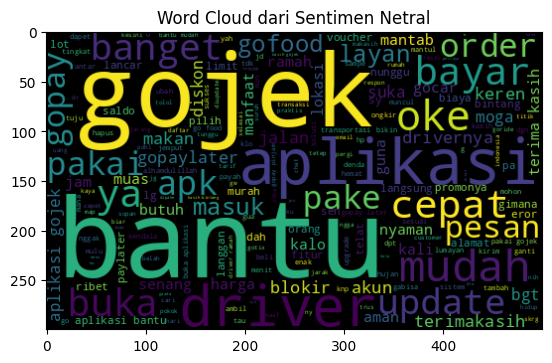

In [ ]:
import matplotlib.pyplot as plt

df_netral = df3[df3['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in df_netral['content']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

In [ ]:
temp = df3.groupby('sentimen').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentimen,content
1,Netral,3987
2,Positif,2541
0,Negatif,1562


<Axes: xlabel='sentimen', ylabel='count'>

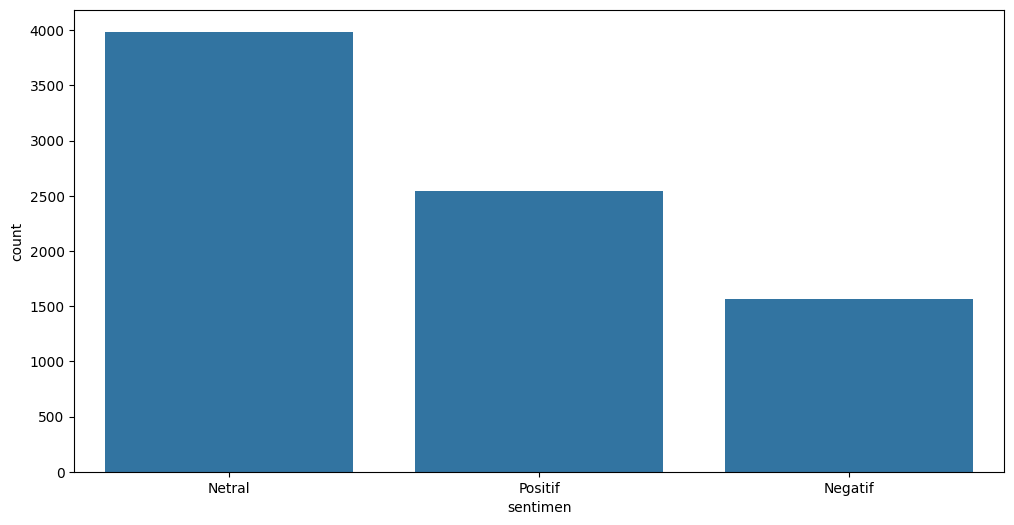

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=df3)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentimen,
    values = temp.content,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))
fig.show()

In [ ]:
!pip install palettable
from palettable.colorbrewer.qualitative import Pastel1_7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.5 MB/s eta 0:00:00


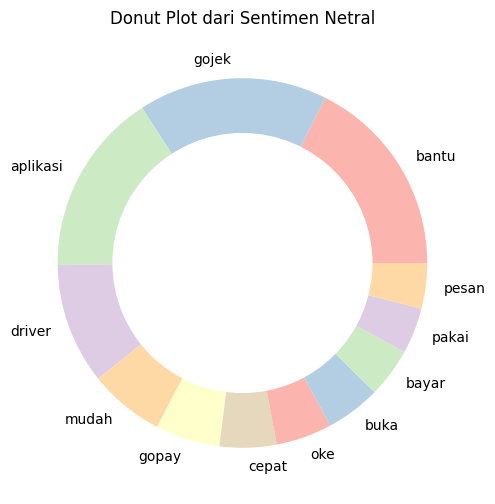

In [ ]:
unique_netral_words = df_netral['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_netral_words.columns = ['words', 'count']
top_20_words = unique_netral_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen Netral')
plt.show()

Perhatikan bahwa, persebaran data tergetnya tidak merata, ini dapat mengakibatkan overfitting, karenanya dilakukan oversampling pada ML Models

#ML Models

Pelatihan analisis sentimen menggunakan TF-IDF untuk mengubah teks menjadi vektor numerik dengan metode TF-IDF (Term Frequency - Inverse Document Frequency). SMOTE untuk menangani ketidakseimbangan data, biasanya, dalam analisis sentimen, data cenderung tidak seimbang (misalnya, lebih banyak ulasan positif daripada negatif), SMOTE (Synthetic Minority Over-sampling Technique) menambahkan sampel sintetis pada kelas yang lebih sedikit agar distribusi kelas menjadi lebih seimbang. serta Random Forest untuk klasifikasi, dengan hyperparameter tuning RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik untuk Random Forest.


---
didapat hasil akurasi 0.93

In [ ]:
#Encode target
le = LabelEncoder()
df3['label'] = le.fit_transform(df3['sentimen'])
df3 = df3.reset_index(drop=True)
df3

,userName,content,score,sentimen,label
0,Abu karim aljabbar Mkatiksaidi,ramah banget,5,Netral,1
1,Fathan Mubina,update nggak buka,4,Netral,1
2,Nyauw Jin Fie,good,5,Positif,2
3,Tanaka Kun,good,5,Positif,2
4,Anton S.,bantu,5,Netral,1
...,...,...,...,...,...
8085,Malik Azis,gopay mantap,5,Positif,2
8086,Zunus,buka aplnya hapus download beberpa kali restar...,1,Netral,1
8087,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1,Netral,1
8088,Melanie Anggi,fitur gomed ya,5,Netral,1


In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df3['content'])
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 44103 stored elements and shape (8090, 6961)>

In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df3['sentimen'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6472, 6961), (1618, 6961))

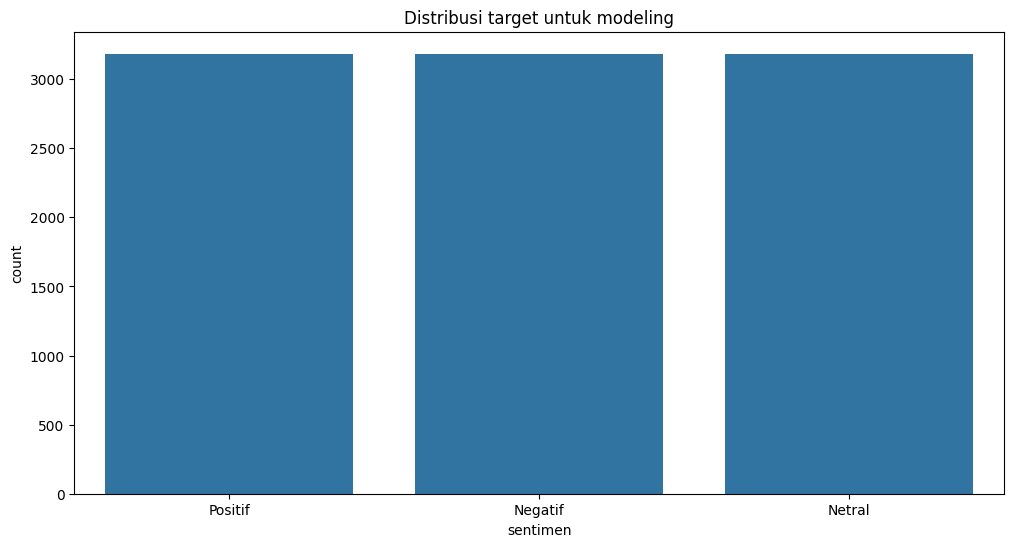

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# init parameters
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [ ]:
%%time
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

CPU times: user 3min, sys: 212 ms, total: 3min 1s
Wall time: 3min 15s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [ ]:
# print best param
print("\nBest Parameters for Random Forest:", rf_model.best_params_)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# evaluasi model
from sklearn.metrics import classification_report

y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.82      0.92      0.87       310
      Netral       0.96      0.96      0.96       803
     Positif       0.98      0.90      0.94       505

    accuracy                           0.93      1618
   macro avg       0.92      0.93      0.92      1618
weighted avg       0.94      0.93      0.94      1618



#DL MODELS

Eksperimen pelatihan analisis sentimen dari dataset GOJEK menggunakan model distilBERT yang telah di-pretrained pada teks umum, ditambahkan fully connected layer untuk klasifikasi sentimen, menggunakan AdamW sebagai optimizer untuk menyesuaikan bobot model selama pelatihan, dengan learning rate 2e-5, batch size 16, epoch 5. Proses pelatihan dilakukan dengan PyTorch dan Weights & Biases (wandb) untuk tracking performa model.


---
didapat hasil akurasi 0.97713

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import wandb

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
df3

,userName,content,score,sentimen,label
0,Abu karim aljabbar Mkatiksaidi,ramah banget,5,Netral,1
1,Fathan Mubina,update nggak buka,4,Netral,1
2,Nyauw Jin Fie,good,5,Positif,2
3,Tanaka Kun,good,5,Positif,2
4,Anton S.,bantu,5,Netral,1
...,...,...,...,...,...
8085,Malik Azis,gopay mantap,5,Positif,2
8086,Zunus,buka aplnya hapus download beberpa kali restar...,1,Netral,1
8087,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1,Netral,1
8088,Melanie Anggi,fitur gomed ya,5,Netral,1


In [ ]:
# Encode sentiment labels
label_encoder = LabelEncoder()
df3['sentiment_encoded'] = label_encoder.fit_transform(df3['sentimen'])
df3

,userName,content,score,sentimen,label,sentiment_encoded
0,Abu karim aljabbar Mkatiksaidi,ramah banget,5,Netral,1,1
1,Fathan Mubina,update nggak buka,4,Netral,1,1
2,Nyauw Jin Fie,good,5,Positif,2,2
3,Tanaka Kun,good,5,Positif,2,2
4,Anton S.,bantu,5,Netral,1,1
...,...,...,...,...,...,...
8085,Malik Azis,gopay mantap,5,Positif,2,2
8086,Zunus,buka aplnya hapus download beberpa kali restar...,1,Netral,1,1
8087,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1,Netral,1,1
8088,Melanie Anggi,fitur gomed ya,5,Netral,1,1


In [ ]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    df3['content'],
    df3['sentiment_encoded'],
    test_size=0.2,
    random_state=42
)

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

DistilBertTokenizer(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
X_train

,content
6210,bagus
5400,best
6220,tolong dipebaikii aplikasi
4373,driver sopan layan muas
1703,nggak dipake gopaylaternya
...,...
5226,drivernya payah alas kalo cari driver deh
5390,heran deh gopaylater blokir bayar telat saldo ...
860,banyakin promonya min
7603,mohon proses kembali dana transaksi gagal lagi...


Kode ini bertujuan untuk membuat custom dataset menggunakan PyTorch untuk memproses teks sentimen agar dapat digunakan dalam model Transformer (DistilBERT).

Tujuan: Membuat dataset kustom yang bisa digunakan dalam PyTorch DataLoader.

Parameter:
- texts: Kumpulan teks (ulasan atau komentar pengguna).
- labels: Label sentimen dalam bentuk numerik (misalnya, 0=negatif, 1=netral, 2=positif).
- tokenizer: Tokenizer dari DistilBERT untuk mengonversi teks menjadi token.
max_len: Panjang maksimum teks setelah tokenisasi (default = 128).

In [ ]:
# Custom Dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        }

# Create DataLoaders
train_dataset = SentimentDataset(X_train, y_train, tokenizer)
val_dataset = SentimentDataset(X_val, y_val, tokenizer)
train_dataset


**Proses Tokenisasi:**
- encode_plus(): Mengonversi teks menjadi token ID menggunakan DistilBERT tokenizer.
- add_special_tokens=True: Menambahkan token spesial [CLS] di awal dan [SEP] di akhir teks.
- max_length=self.max_len: Mengatur panjang token maksimal (128).
- padding='max_length': Menambahkan padding jika teks lebih pendek dari 128 token.
- truncation=True: Memotong teks jika terlalu panjang.
return_tensors='pt': Mengembalikan dalam format PyTorch tensor.

**Hasil:**
- input_ids: Representasi numerik teks dalam bentuk token ID.
- attention_mask: Masking (1 untuk token, 0 untuk padding).
- labels: Label sentimen dalam bentuk tensor PyTorch.

In [ ]:
#dataset ini bisa digunakan dalam DataLoader untuk training model
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
train_loader

In [ ]:
from tqdm import tqdm

In [ ]:
# Initialize wandb
wandb.init(
    project='sentiment-classification-GOJEK',
    config={
        'model': 'DistilBERT',
        'learning_rate': 2e-5,
        'epochs': 5,
        'batch_size': 16
    }
)

# Model
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(label_encoder.classes_)
)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 5
for epoch in tqdm(range(num_epochs), desc='Epochs'):
    model.train()
    train_loss = 0

    # Progress bar for training batches
    train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}', leave=False)
    for batch in train_progress:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Update progress bar
        train_progress.set_postfix({'loss': loss.item()})

    # Validation
    model.eval()
    val_loss = 0
    correct_preds = 0
    total_preds = 0

    # Progress bar for validation
    val_progress = tqdm(val_loader, desc='Validation', leave=False)
    with torch.no_grad():
        for batch in val_progress:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            val_loss += outputs.loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            correct_preds += (preds == labels).sum().item()
            total_preds += labels.size(0)

            # Update validation progress bar
            val_progress.set_postfix({'loss': outputs.loss.item()})

    # Calculate metrics
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    val_accuracy = correct_preds / total_preds

    # Log metrics to wandb
    wandb.log({
        'train_loss': train_loss,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy
    })

# Finish wandb run
wandb.finish()

# Save the model
torch.save(model.state_dict(), 'sentiment_model.pth')

# Print unique labels and their encoded values
print("Label Mapping:")
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hilmy-rahmadani to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 405/405 [01:10<00:00,  6.26it/s, loss=0.183]
                                                                      
Epoch 2: 100%|██████████| 405/405 [01:13<00:00,  6.27it/s, loss=0.102]
                                                                      
Epoch 3: 100%|██████████| 405/405 [01:13<00:00,  6.28it/s, loss=0.0272]
                                                                       
Epoch 4: 100%|██████████| 405/405 [01:13<00:00,  6.21it/s, loss=0.00826]
                                                                        
Epoch 5: 100%|██████████| 405/405 [01:14<00:00,  6.29it/s, loss=0.146]
  

train_loss,█▃▂▁▁
val_accuracy,▁▂▅▇█
val_loss,█▆▄▂▁
train_loss,0.04401
val_accuracy,0.97713
val_loss,0.09568


Label Mapping:
Negatif: 0
Netral: 1
Positif: 2


View run wandering-pine-2 at: https://wandb.ai/hilmy-rahmadani/sentiment-classification-GOJEK/runs/296gustn
View project at: https://wandb.ai/hilmy-rahmadani/sentiment-classification-GOJEK

In [ ]:
train_loss	0.04401
val_accuracy	0.97713
val_loss	0.09568